# Detecting peaks in signal and adjusting speaker delay

In [87]:
import librosa
import matplotlib
import numpy

audio_data = 'delay.wav'
hop_length = 256

In [88]:
x, sr = librosa.load(audio_data, sr=44100) # Specify frequency of the source (here we used the maximum allowed on the Android device)

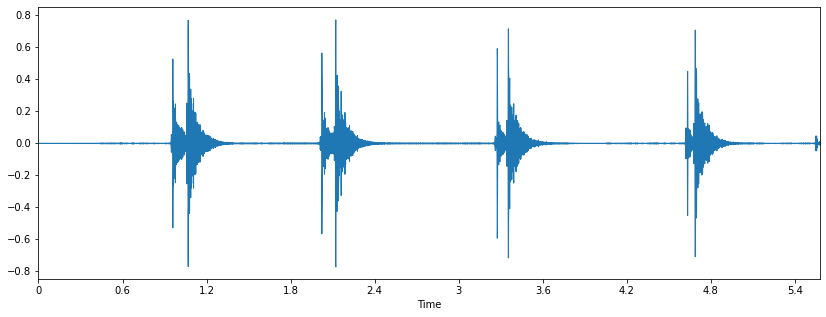

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

(0.0, 20.146186065673827)

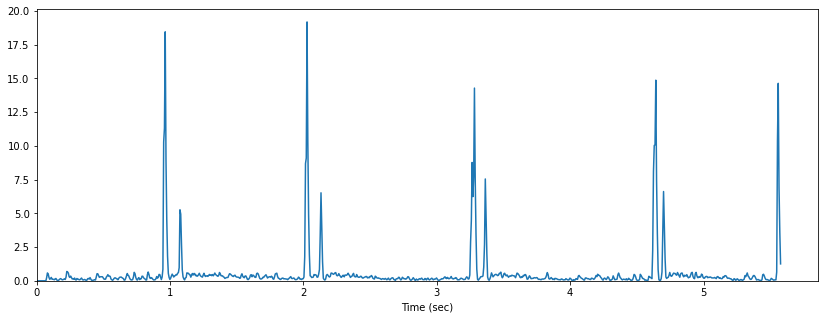

In [90]:
plt.figure(figsize=(14, 5))
plt.plot(t, onset_envelope)
plt.xlabel('Time (sec)')
plt.xlim(xmin=0)
plt.ylim(0)

In [91]:
onset_envelope = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length)

N = len(x)
T = N/float(sr)
t = numpy.linspace(0, T, len(onset_envelope))

onset_frames = librosa.util.peak_pick(onset_envelope, 7, 7, 7, 7, 0.5, 5)
print('{} peaks detected'.format(len(onset_frames)))

9 peaks detected


(0.0, 20.146186065673827)

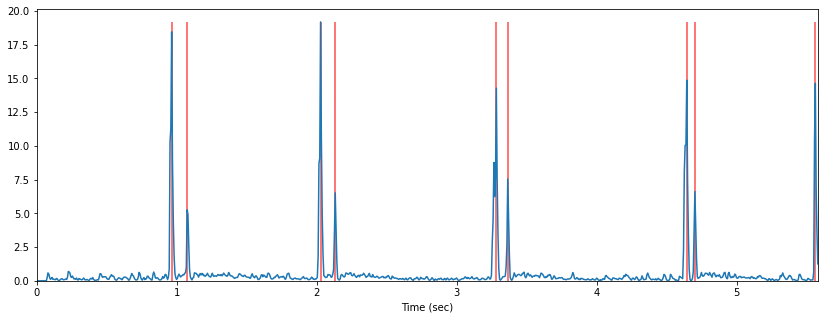

In [92]:
plt.figure(figsize=(14, 5))
plt.plot(t, onset_envelope)
plt.grid(False)
plt.vlines(t[onset_frames], 0, onset_envelope.max(), color='r', alpha=0.7)
plt.xlabel('Time (sec)')
plt.xlim(0, T)
plt.ylim(0)

In [93]:
first_peak = librosa.frames_to_time(onset_frames[0], sr=sr, hop_length=hop_length)
print("First peak is at {} ms with amplitude : ".format(first_peak, ))

First peak is at 0.9636281179138322 ms with amplitude : 


In [94]:
consecutive_delay = \
librosa.frames_to_time(onset_frames[1], sr=sr, hop_length=hop_length) - \
    librosa.frames_to_time(onset_frames[0], sr=sr, hop_length=hop_length)

print("Delay between first 2 peaks : {} ms".format(consecutive_delay))

Delay between first 2 peaks : 0.1102947845804989 ms


In [95]:
average = 0
for i in range(0, len(onset_frames)-1, 2):
    current_sample = librosa.frames_to_time(onset_frames[i],   sr=sr, hop_length=hop_length)
    next_sample    = librosa.frames_to_time(onset_frames[i+1], sr=sr, hop_length=hop_length)

    consecutive_delay = next_sample - current_sample
    average += consecutive_delay

    print("Delay between {}-{} peaks : {} s".format(i, i+1, consecutive_delay))

average = average / (len(onset_frames)/2)
print("Averaged : {} s".format(average))

Delay between 0-1 peaks : 0.1102947845804989 s
Delay between 2-3 peaks : 0.10448979591836727 s
Delay between 4-5 peaks : 0.08126984126984116 s
Delay between 6-7 peaks : 0.058049886621315494 s
Averaged : 0.07868984630889396 s
